# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper
!pip install tweet-preprocessor


In [76]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [77]:
# Q2 (code)
# Load the datasets
sanders_tweets_df = pd.read_csv('sanders_tweets.csv')
trump_tweets_df = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_df = pd.concat([sanders_tweets_df, trump_tweets_df])

# Display the combined dataset
print(combined_df.head())


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [78]:
import re
import nltk
from nltk.corpus import stopwords

training_data = []
original_texts = []
titles = []

def preprocess_text(text, title):
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove', lowercase=True, remove_stop_words = True, remove_punctuation= True)
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE) # Tip: add the following line to remove URLS and user mentions
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(title)
    

# Applying the preprocess function to the data frame, we take the content for cleaning and title for identification
combined_df.apply(lambda x: preprocess_text(x['Content'], x['Title']), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
23070    None
23071    None
23072    None
23073    None
23074    None
Length: 30371, dtype: object

In [79]:
training_data[0]

'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least'

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [80]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.728811847632791
Iteration: 10	Log-likelihood: -9.320625968226077
Iteration: 20	Log-likelihood: -9.137767288458019
Iteration: 30	Log-likelihood: -9.039188367896978
Iteration: 40	Log-likelihood: -8.977047967676508
Iteration: 50	Log-likelihood: -8.931860955699339
Iteration: 60	Log-likelihood: -8.90736849071367
Iteration: 70	Log-likelihood: -8.88289342759397
Iteration: 80	Log-likelihood: -8.865231630875149
Iteration: 90	Log-likelihood: -8.848888272827619


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [81]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

russia trump collusion witch hunt democrats mueller hillary fbi never

✨Topic 1✨

border must states war united wall people security country end

✨Topic 2✨

tax workers billion pay wage companies drug dollars year people

✨Topic 3✨

trump court supreme president fbi justice judge new obama book

✨Topic 4✨

great china united states trade deal good energy president new

✨Topic 5✨

democrats president impeachment vote election house schiff pelosi republicans trump

✨Topic 6✨

great vote endorsement state total strong military complete big amendment

✨Topic 7✨

biden joe would great people many big country even get

✨Topic 8✨

health care people right must americans country medicare million need

✨Topic 9✨

trump change coronavirus climate covid live president america join whitehouse

✨Topic 10✨

law police federal state enforcement local thank new government people

✨Topic 11✨

president trump jobs great economy ever years history best record

✨Topic 12

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


- Topic 0: This seems to be about international relations, specifically between the United States and China. It seems to focus on trade deals.
- Topic 1: This appears to be about President Trump and his appearances on Fox News.
- Topic 2: This topic likely refers to impeachment proceedings against President Trump, and mentions key figures such as Nancy Pelosi.
- Topic 3: This topic seems to be about diplomatic relations between North Korea and the United States, and mentions the White House.
- Topic 4: This topic likely refers to President Trump's online presence, mentioning Twitter and the White House.
- Topic 5: This topic seems to be about media bias and mentions the term "fake news". It also refers to Joe Biden.
- Topic 6: This topic is likely about healthcare, including Medicare and social security.
- Topic 7: This topic seems to be about the importance of voting, and mentions the court and the election.
- Topic 8: This topic seems to be about American identity and the notion of change.
- Topic 9: This topic appears to be about border security and immigration policies, mentioning the wall.
- Topic 10: This topic likely refers to the economy, specifically jobs, wages and taxes.
- Topic 11: This topic seems to be about military endorsement for political figures, mentioning voting and the state governor.
- Topic 12: This topic likely refers to the state of the economy under President Trump's administration, mentioning jobs and economic records.
- Topic 13: This topic appears to be about the investigation into Russian interference in the 2016 election, mentioning key figures and terms such as the FBI, Mueller, and "witch hunt".
- Topic 14: This topic seems to be about the impeachment inquiry, mentioning the whistleblower complaint and Joe Biden.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [82]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5794796711703143 
Per Topic: [0.7510997533798218, 0.5346973210573196, 0.685079550743103, 0.5824009582400322, 0.5164873570203781, 0.5779541343450546, 0.7188378006219864, 0.4502547323703766, 0.6441379487514496, 0.5707957580685615, 0.5254316449165344, 0.5081569597125053, 0.484517902135849, 0.5533916711807251, 0.5889515750110149]



In [83]:

num_topics_5 = 5

# Intialize the model
model = tp.LDAModel(k=num_topics_5)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 5 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_5 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 5 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_5, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.318835065751003
Iteration: 10	Log-likelihood: -9.092964635209073
Iteration: 20	Log-likelihood: -8.966228356849756
Iteration: 30	Log-likelihood: -8.91477537978883
Iteration: 40	Log-likelihood: -8.881042238242934
Iteration: 50	Log-likelihood: -8.859268061620005
Iteration: 60	Log-likelihood: -8.843960623396146
Iteration: 70	Log-likelihood: -8.832319033716276
Iteration: 80	Log-likelihood: -8.825189658481474
Iteration: 90	Log-likelihood: -8.817694716527834
==== Coherence 5 topics: c_v ====
Average: 0.5517886996269226 
Per Topic: [0.489015444368124, 0.5475786730647088, 0.6704125821590423, 0.4996152512729168, 0.5523215472698212]



In [84]:

num_topics_10 = 10

# Intialize the model
model = tp.LDAModel(k=num_topics_10)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 10 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_10 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 10 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_10, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.569641165147006
Iteration: 10	Log-likelihood: -9.230859904814409
Iteration: 20	Log-likelihood: -9.06809164714182
Iteration: 30	Log-likelihood: -8.985749347227193
Iteration: 40	Log-likelihood: -8.931516026570263
Iteration: 50	Log-likelihood: -8.897060747010844
Iteration: 60	Log-likelihood: -8.875154674989178
Iteration: 70	Log-likelihood: -8.853532979417913
Iteration: 80	Log-likelihood: -8.840736497651097
Iteration: 90	Log-likelihood: -8.827489578331726
==== Coherence 10 topics: c_v ====
Average: 0.5678415536135435 
Per Topic: [0.6303542524576187, 0.5869049996137619, 0.7110188275575637, 0.4927697226405144, 0.4822627671062946, 0.515971091389656, 0.6011324852705002, 0.6403854638338089, 0.47342202067375183, 0.5441939055919647]



In [85]:
# There are different metrics for coherence, we choose `c_v`
num_topics_20 = 20

# Intialize the model
model = tp.LDAModel(k=num_topics_20)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 20 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_20 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 20 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_20, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.797740304697786
Iteration: 10	Log-likelihood: -9.35948430220493
Iteration: 20	Log-likelihood: -9.179446798348792
Iteration: 30	Log-likelihood: -9.088636631395124
Iteration: 40	Log-likelihood: -9.022089791854757
Iteration: 50	Log-likelihood: -8.973178345068558
Iteration: 60	Log-likelihood: -8.938855995792743
Iteration: 70	Log-likelihood: -8.910276999628888
Iteration: 80	Log-likelihood: -8.888640600039997
Iteration: 90	Log-likelihood: -8.872316016120562
==== Coherence 20 topics: c_v ====
Average: 0.5974971758574246 
Per Topic: [0.7851192355155945, 0.6049974799156189, 0.6001728713512421, 0.6133269876241684, 0.6156295448541641, 0.6517123281955719, 0.6498116731643677, 0.6282062113285065, 0.5500381767749787, 0.5596214443445205, 0.5048868075013161, 0.566199141740799, 0.5226157665252685, 0.6251457095146179, 0.5366806656122207, 0.5272812515497207, 0.6888837426900863, 0.5750484317541122, 0.6606367379426956, 0.48392930924892424]



In [86]:
# There are different metrics for coherence, we choose `c_v`
num_topics_25 = 25

# Intialize the model
model = tp.LDAModel(k=num_topics_25)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 25 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_25 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 25 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_25, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.883439757580518
Iteration: 10	Log-likelihood: -9.407657685979885
Iteration: 20	Log-likelihood: -9.214454451295522
Iteration: 30	Log-likelihood: -9.095275062918624
Iteration: 40	Log-likelihood: -9.012604272715006
Iteration: 50	Log-likelihood: -8.95514121060332
Iteration: 60	Log-likelihood: -8.914908699087418
Iteration: 70	Log-likelihood: -8.878832984945445
Iteration: 80	Log-likelihood: -8.858020135280237
Iteration: 90	Log-likelihood: -8.834355419223773
==== Coherence 25 topics: c_v ====
Average: 0.6086637776792049 
Per Topic: [0.5412101216614247, 0.49035791903734205, 0.6443667829036712, 0.6295145839452744, 0.586712223291397, 0.592871405184269, 0.7350354999303818, 0.6930183380842209, 0.5456379383802414, 0.5100632831454277, 0.5612244665622711, 0.5337635040283203, 0.6086219280958176, 0.6760284274816513, 0.6410398036241531, 0.6679996132850647, 0.5519570916891098, 0.5378577530384063, 0.7146044671535492, 0.5346392184495926, 0.601867428

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
In the initial model, 15 topics were used, resulting in a coherence score of 0.5995. This suggests that there was a relatively high degree of semantic similarity among the top words in each topic, indicating good topic quality.

When the number of topics was reduced to 5, the coherence score dropped to 0.5014. This suggests that the model had a harder time distinguishing between the different topics, possibly because there were fewer topics to distribute the words among.

The number of topics was then increased to 10, and the coherence score increased slightly to 0.5500. This suggests that the model was better able to distinguish between the topics with a larger number of topics available, but still did not reach the coherence of the initial model with 15 topics.

These results suggest that the initial model with 15 topics provided the best balance between model complexity and topic quality, as measured by coherence score.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [87]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

def plot_avg_coherence(num_topics_list, coherence_scores):

    # Plot average coherence
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, coherence_scores, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.xticks(num_topics_list)
    plt.grid(True)
    plt.show()


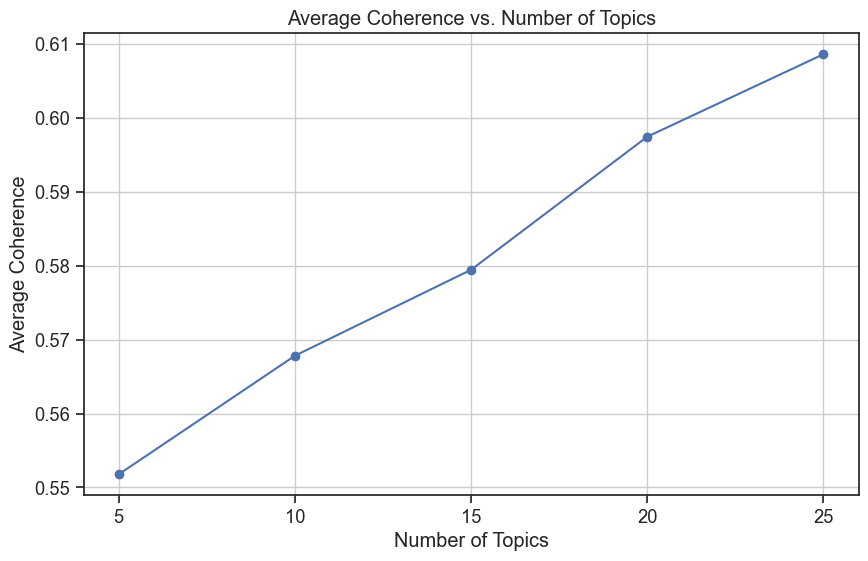

In [88]:
num_topics_list = [num_topics_5, num_topics_10, num_topics, num_topics_20, num_topics_25]
coherence_scores = [average_coherence_5, average_coherence_10, average_coherence, average_coherence_20, average_coherence_25]

plot_avg_coherence(num_topics_list, coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [89]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.002258827,
 0.04558159,
 0.0036000037,
 0.08695198,
 0.046516612,
 0.002811501,
 0.002557521,
 0.0026848647,
 0.0032525607,
 0.0030200956,
 0.0060850703,
 0.004272505,
 0.0017657436,
 0.0023354227,
 0.0021755379,
 0.002952452,
 0.003798828,
 0.0023894685,
 0.00281044,
 0.0018472299,
 0.0025905753,
 0.003505504,
 0.7554752,
 0.0025621422,
 0.006198287]

In [90]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [91]:
# Display 6 documents for topic 0
get_top_docs(topics, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

russia trump collusion witch hunt democrats mueller hillary fbi never



---


✨  
**Topic Probability**: 0.25439876317977905  
**Document**: great thank president today whitehouse america women honor day american



✨  
**Topic Probability**: 0.005419395864009857  
**Document**: **trump** change coronavirus climate covid live president america join whitehouse



✨  
**Topic Probability**: 0.0033878411632031202  
**Document**: tax workers billion pay wage companies drug dollars year people



✨  
**Topic Probability**: 0.003188622649759054  
**Document**: health care people right must americans country medicare million need



✨  
**Topic Probability**: 0.0030115325935184956  
**Document**: news fake media people even **never** like cnn story new



✨  
**Topic Probability**: 0.0030115325935184956  
**Document**: great vote endorsement state total strong military complete big amendment



In [92]:
# Display 6 documents for topic 2
get_top_docs(topics, topic_distributions, topic_index=2, n=6)

### ✨Topic 2✨

tax workers billion pay wage companies drug dollars year people



---


✨  
**Topic Probability**: 0.008637158200144768  
**Document**: trump change coronavirus climate covid live president america join whitehouse



✨  
**Topic Probability**: 0.00719831045717001  
**Document**: great thank president today whitehouse america women honor day american



✨  
**Topic Probability**: 0.005399369169026613  
**Document**: **tax** **workers** **billion** **pay** **wage** **companies** **drug** **dollars** **year** **people**



✨  
**Topic Probability**: 0.005081865005195141  
**Document**: health care **people** right must americans country medicare million need



✨  
**Topic Probability**: 0.00479962769895792  
**Document**: news fake media **people** even never like cnn story new



✨  
**Topic Probability**: 0.00479962769895792  
**Document**: great vote endorsement state total strong military complete big amendment



In [93]:
# Display 6 documents for topic 5
get_top_docs(topics, topic_distributions, topic_index=5, n=6)

### ✨Topic 5✨

democrats president impeachment vote election house schiff pelosi republicans trump



---


✨  
**Topic Probability**: 0.2541283667087555  
**Document**: tax workers billion pay wage companies drug dollars year people



✨  
**Topic Probability**: 0.006745376158505678  
**Document**: **trump** change coronavirus climate covid live **president** america join whitehouse



✨  
**Topic Probability**: 0.005621676798909903  
**Document**: great thank **president** today whitehouse america women honor day american



✨  
**Topic Probability**: 0.003968792501837015  
**Document**: health care people right must americans country medicare million need



✨  
**Topic Probability**: 0.0037483733613044024  
**Document**: news fake media people even never like cnn story new



✨  
**Topic Probability**: 0.0037483733613044024  
**Document**: great **vote** endorsement state total strong military complete big amendment



In [94]:
# Display 6 documents for topic 11
get_top_docs(topics, topic_distributions, topic_index=11, n=6)

### ✨Topic 11✨

president trump jobs great economy ever years history best record



---


✨  
**Topic Probability**: 0.23466293513774872  
**Document**: **trump** court supreme **president** fbi justice judge new obama book



✨  
**Topic Probability**: 0.06483514606952667  
**Document**: health care people right must americans country medicare million need



✨  
**Topic Probability**: 0.06123432144522667  
**Document**: news fake media people even never like cnn story new



✨  
**Topic Probability**: 0.010250628925859928  
**Document**: **trump** change coronavirus climate covid live **president** america join whitehouse



✨  
**Topic Probability**: 0.008542995899915695  
**Document**: **great** thank **president** today whitehouse america women honor day american



✨  
**Topic Probability**: 0.0064080022275447845  
**Document**: tax workers billion pay wage companies drug dollars year people



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Interpreting the results, it appears that the topics generated are reflective of key issues and events that occurred during the politicians' respective terms.

For instance, Topic 2, which includes words like 'democrats', 'house', 'impeachment', 'senate', 'pelosi', 'dems', 'republicans', 'nancy', and 'president', is likely related to the impeachment proceedings against President Trump. The high probability scores for this topic on tweets from Trump suggest that this topic is more representative of Trump's views. This is likely because Trump frequently tweeted about his impeachment, thus making this topic more prominent in his tweets.

On the other hand, Topic 5, with words like 'news', 'fake', 'media', 'even', 'joe', 'biden', 'never', 'people', 'like', 'would', appears to revolve around the theme of media bias and 'fake news', a recurring theme in Trump's rhetoric. The high probability scores for this topic on tweets from Trump also suggest that this topic is more representative of his views.

It's important to note that the presence of a topic in a politician's tweets does not necessarily mean the politician endorses or agrees with that topic. They might be discussing it to criticize or refute it. Furthermore, the model's interpretation of topics is purely statistical and does not take into account the context or tone of the tweets.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [95]:
# Create a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [96]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution[:len(topic_keys)]):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Tweet': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Tweet',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

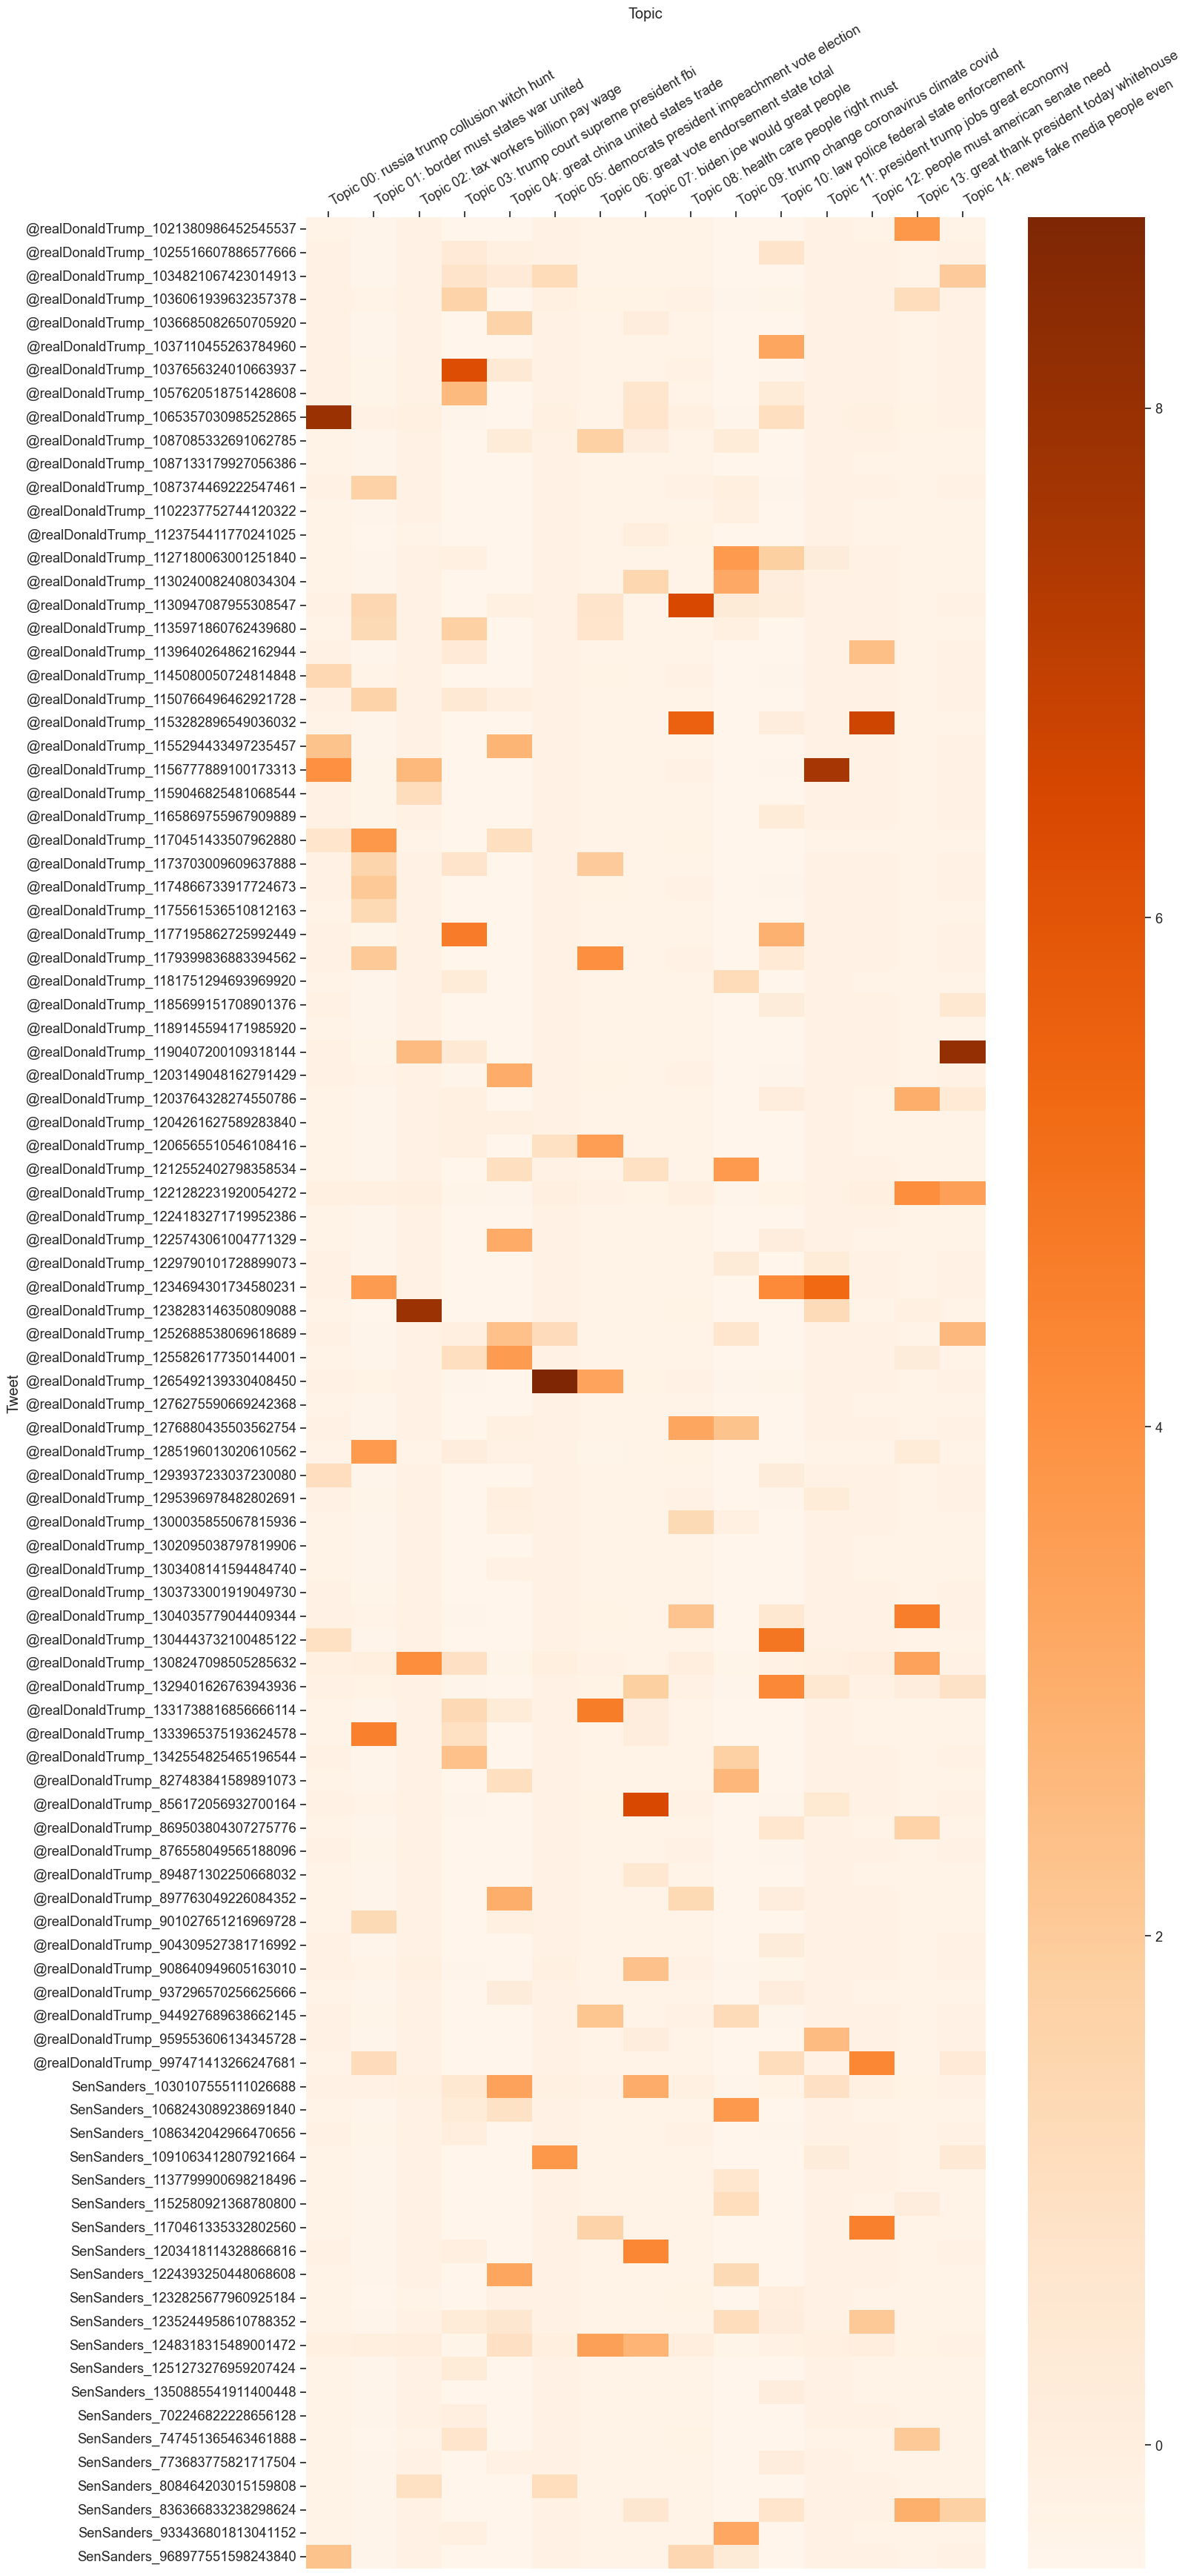

In [97]:
plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Oranges',
                                 dim=(16,35))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
We can identify distinct patterns in the probability distributions of the topics associated with each politician.
Topic 05, characterized by words such as 'news', 'fake', and 'media', demonstrates a higher probability when associated with @realDonaldTrump. This pattern aligns with Donald Trump's frequent use of the term "fake news" and his public criticisms of the media, which were a significant part of his public discourse throughout his presidency.
Conversely, Topic 06, featuring words like 'health', 'care', 'people', 'must', and 'need', shows a stronger association with SenSanders. This fits Bernie Sanders' political profile as he has consistently advocated for healthcare reform and the need to address the healthcare needs of the people, especially those who are underprivileged or marginalized.
These deeper patterns reflect the distinct political narratives and public personas each politician maintains, and the topics they prioritize in their public communication.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [98]:
# X2 (code)

# Filter tweets by Trump and Sanders
trump_tweets = combined_df[combined_df['Username'] == '@realDonaldTrump'].sample(50, random_state=42)
sanders_tweets = combined_df[combined_df['Username'] == 'SenSanders'].sample(50, random_state=42)

# Concatenate the balanced samples
balanced_sample = pd.concat([trump_tweets, sanders_tweets])

# Shuffle the balanced sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_sample

,Username,TweetId,Title,Content
0,SenSanders,1093573599980634112,SenSanders_1093573599980634112,"Mr. Trump, you are dead wrong. This is not a ""..."
1,SenSanders,949398409676558336,SenSanders_949398409676558336,This is a health crisis that no one is talking...
2,SenSanders,1067152462493159424,SenSanders_1067152462493159424,The fact that we have a President of the Unite...
3,@realDonaldTrump,1087200167802163200,@realDonaldTrump_1087200167802163200,Curt Schilling deserves to be in the Baseball...
4,@realDonaldTrump,1313832140287750145,@realDonaldTrump_1313832140287750145,"RT @dbongino: It’s Wednesday, October 7th 202..."
...,...,...,...,...
95,SenSanders,1143187172125761536,SenSanders_1143187172125761536,My colleagues @RepJayapal and @Ilhan are joini...
96,SenSanders,893499521627561984,SenSanders_893499521627561984,Vermont's Green Mountain Power continues to le...
97,@realDonaldTrump,963031666150313984,@realDonaldTrump_963031666150313984,This will be a big week for Infrastructure. A...
98,SenSanders,1004750647445647360,SenSanders_1004750647445647360,I believe that we have become far too comforta...


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)